In [1]:
from nltk.tokenize import regexp_tokenize

In [2]:
import nltk

nltk.download('brown')
nltk.download('gutenberg')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
emma = gutenberg.open(gutenberg.fileids()[0]).read()

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import regexp_tokenize, TweetTokenizer

In [8]:
len(emma.splitlines()) ,len(sent_tokenize(emma))

(16823, 7493)

# Text 객체 보기

In [9]:
from nltk.text import Text

In [10]:
emmaObj = Text(word_tokenize(emma))

#### vocab 빈도분포를 나타낸다

In [11]:
emmaObj.vocab()

FreqDist({',': 12016, '.': 6355, 'to': 5125, 'the': 4844, 'and': 4653, 'of': 4272, 'I': 3177, '--': 3100, 'a': 3001, "''": 2452, ...})

In [12]:
emmaObj.vocab().B() #unique한 개수

8406

In [13]:
emmaObj.vocab().N() #전체개수

191785

In [15]:
emmaObj.vocab().most_common(10) #상위 10개 개수 돌려준다.

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452)]

##### 최다빈도, 최소빈도 단어들끼리 정렬이 가능하다.

In [16]:
emmaObj.vocab().freq(',') #전체에서 몇퍼센트 차지하는지 

0.06265349219177725

In [18]:
emmaObj.vocab().get(',')/emmaObj.vocab().N() #콤마의 개수 / 전체 개수. 위와 똑같은걸 확인할 수 있다. 

0.06265349219177725

In [17]:
emmaObj.vocab().get(',')

12016

# Zipf's Law

In [19]:
emmaObj.plot()
#8400개 정도를 보려니 컴퓨터가 뻗을수도 있다. 

KeyboardInterrupt: 

In [20]:
import matplotlib.pyplot as plt

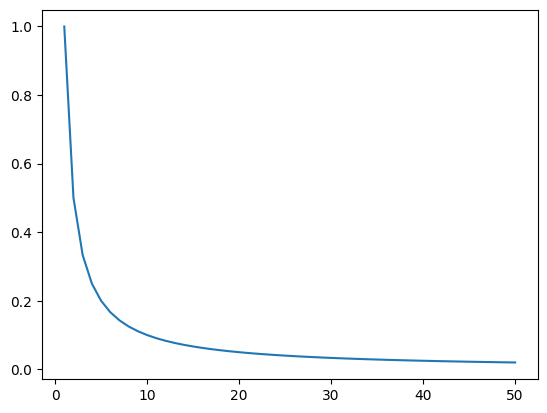

In [22]:
plt.plot(range(1,51), [1/i for i in range(1, 51)])
#상위 50개에 대한 그래프를 확인 할 수 있다.

In [23]:
#12016 개의 빈도를 가진 콤마를 가지고 해볼려고한다.
maxfreq = emmaObj.vocab().get(',')

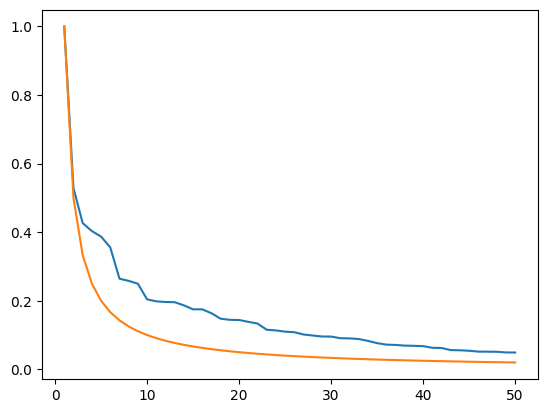

In [26]:
plt.plot(range(1,51), [t[1]/maxfreq for t in emmaObj.vocab().most_common(50)])
plt.plot(range(1,51), [1/i for i in range(1, 51)])
#일치한거라고 한다,,,, 

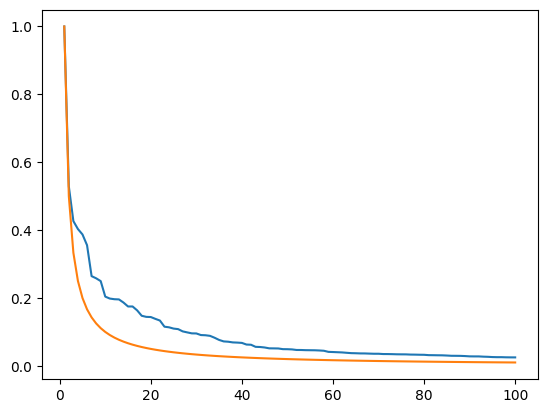

In [28]:
N=101
plt.plot(range(1,N), [t[1]/maxfreq for t in emmaObj.vocab().most_common(N-1)])
plt.plot(range(1,N), [1/i for i in range(1, N)])
#경향성이 비슷해.. 보인다... 
#왜 이렇게 나오냐고? 충분히 유익한 단어를 덜 뽑아서 그런거다

In [29]:
from nltk.tag import pos_tag

In [31]:
len(set(pos_tag(word_tokenize(emma)))),\
len(pos_tag(word_tokenize(emma)))

(10974, 191785)

In [32]:
emmaPos = Text(pos_tag(word_tokenize(emma)))

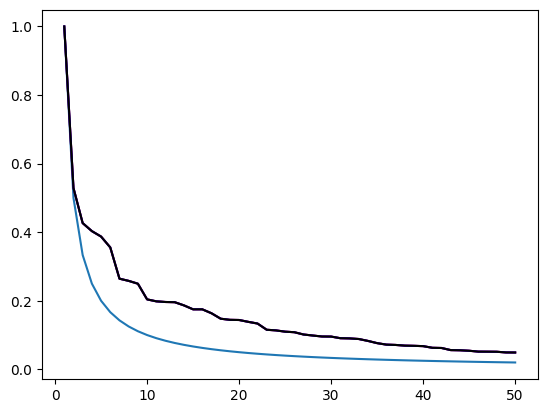

In [35]:
N=51
plt.plot(range(1,N), [1/i for i in range(1, N)])
plt.plot(range(1,N),
         [t[1]/maxfreq for t in emmaObj.vocab().most_common(N-1)],
        'r-')
plt.plot(range(1,N),
         [t[1]/maxfreq for t in emmaObj.vocab().most_common(N-1)],
        'b-')
plt.plot(range(1,N),
         [t[1]/maxfreq for t in emmaObj.vocab().most_common(N-1)],
        'k-')

emmaObj.vo

In [36]:
emmaObj.vocab().most_common(50)

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452),
 ('was', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('in', 2103),
 ('it', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1729),
 ('you', 1664),
 ('had', 1605),
 ('as', 1387),
 ('he', 1365),
 ('for', 1320),
 ('have', 1301),
 ('is', 1221),
 ('with', 1185),
 ('very', 1151),
 ('but', 1148),
 ('Mr.', 1091),
 ('his', 1084),
 ('!', 1063),
 ('at', 996),
 ('so', 918),
 ("'s", 866),
 ('Emma', 855),
 ('all', 831),
 ('could', 824),
 ('would', 813),
 ('been', 755),
 ('him', 748),
 ('on', 674),
 ('Mrs.', 668),
 ('any', 651),
 ('?', 621),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 590)]

## 가장 적은 빈도수의 단어들의 중요도 확인 -> 잘 안쓰이는 표현들이다.

In [37]:
#빈도가 제일 적은순으로 오름차순 한거다. 잘 안쓰이는 표현들이 상위를 차지한다. 
sorted(emmaObj.vocab(), key=emmaObj.vocab().get)

['Austen',
 '1816',
 'twenty-one',
 'vex',
 'indistinct',
 'caresses',
 'nominal',
 'mildness',
 'impose',
 'esteeming',
 'disadvantages',
 'misfortunes',
 'Sorrow',
 'consciousness.',
 'mournful',
 'bride-people',
 'self-denying',
 'debt',
 'tenderer',
 'valetudinarian',
 'amounting',
 'equals',
 'lieu',
 'awoke',
 'Matrimony',
 'chatted',
 'large.',
 'housemaid',
 'pretty-spoken',
 'curtseys',
 'needlework',
 'lock',
 'bangs',
 'backgammon',
 'backgammon-table',
 'eight-and-thirty',
 'Dirty',
 'speck',
 'rained',
 'Especially',
 'gainer',
 'punctual',
 'widower',
 'deathbed',
 'Broadway',
 'drizzle',
 'Farmer',
 'Mitchell',
 'Success',
 'supposes',
 'delicately',
 'do-nothing',
 'do-all',
 'encouragements',
 'grievously',
 'fitted',
 'fish',
 'seven-and-twenty',
 'homely',
 'embodied',
 'military',
 'family-estate',
 'dissuaded',
 'pursue',
 'luxuries',
 'poorer',
 'lingering',
 'kindred',
 'widower-father',
 'competence',
 'portionless',
 'tyrannic',
 'well-judging',
 'choose',
 'av

In [38]:
sorted(emmaObj.vocab(), key=emmaObj.vocab().get, reverse=True)[:10]

[',', '.', 'to', 'the', 'and', 'of', 'I', '--', 'a', "''"]

In [40]:
sumof = 0.0
for t in sorted(emmaObj.vocab(), key=emmaObj.vocab().get,
                reverse=True)[:50]:
    sumof += emmaObj.vocab().freq(t)
sumof

0.5160153296660321

In [41]:
emmaObj.vocab().B()

8406

In [42]:
#이런애들을 빼고, 변별력을 살리기 위해서. 

In [44]:
sumof = 0.0
for t in sorted(emmaObj.vocab(), key=emmaObj.vocab().get)[:2000]:
    sumof += emmaObj.vocab().freq(t)
sumof
#2000개 정도는 1프로를 차지한다... 결국 1/4 정도는 잘 안쓰이는 단어들이다.

0.01042834423964354

In [ ]:
# 결국 6450 개 정도가 실제로 의미를 가지는 단어들인거다. 이게 Zipf's Law 를 통해서.. 

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [50]:
emmaObj.collocations()

Mr. Knightley; Mrs. Weston; Frank Churchill; Mr. Elton; Miss
Woodhouse; Miss Bates; Mrs. Elton; Miss Fairfax; Mr. Weston; Jane
Fairfax; every thing; Mr. Woodhouse; every body; young man; great
deal; dare say; Maple Grove; Mrs. Goddard; John Knightley; Miss Smith


In [52]:
emmaObj.concordance('Emma')
#용례 : Emma 라는 단어가 어떻게 활용됐는지 파악하는거다. 

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

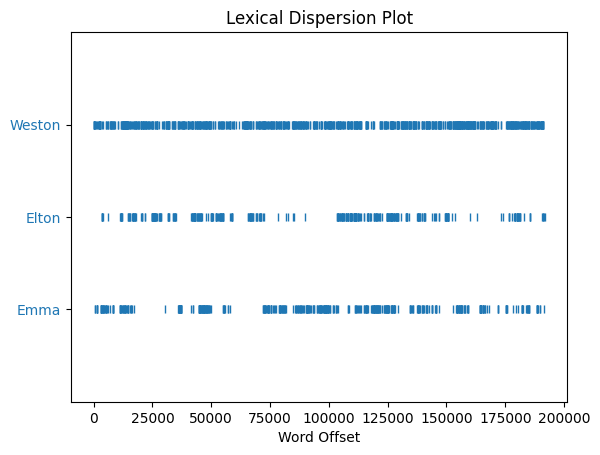

In [53]:
emmaObj.dispersion_plot(['Emma', 'Elton','Weston'])

In [54]:
emmaObj.similar('Emma')
#엠마라는 단어 대신 쓰인 표현을 찾아준다. 

she it he i weston you her harriet elton him me knightley jane that
and the all there they them


In [55]:
emmaObj.similar('Weston')

it emma she he i her you harriet elton that him knightley and them
herself there me all what highbury


In [56]:
emmaObj.similar('Elton')

it he her she emma weston you knightley harriet him i the all there
and highbury me his them what


In [57]:
#좀 이상한데..?

In [58]:
from nltk.stem import PorterStemmer 
#어간 추출 #규칙적으로 잘라준다

In [61]:
ps = PorterStemmer()
ps.stem('was'),\
ps.stem('waied')
#Zipf's Law 에 따라서 너무 고빈도, 저빈도는 자르는데, 그 단어들에 포함되지 않도록, 필요없는부분을 잘라내주는 역할로 쓰는거라고 한다..?

('wa', 'wai')

In [64]:
from nltk.collocations import *

In [67]:
bigram = BigramCollocationFinder.from_words(word_tokenize(emma))

In [69]:
from nltk import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures

In [70]:
bigram.nbest(BigramAssocMeasures().pmi, 10)
#이웃한거

[('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis"),
 ('DEAR', 'MADAM'),
 ('Farmer', 'Mitchell')]

In [71]:
bigram.nbest(BigramAssocMeasures().chi_sq, 10)

[('&', 'c.'),
 ('10,000', 'l.'),
 ('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis")]

In [ ]:
#지금까지 zipf's 법칙을 봤다.
단어의 빈도로 나열을 하면 = 순위의 역과 비례하더라. 
빈도 젤 큰애가 1이면,       순위도 1


# Heaps' Law

In [72]:
t = list()

for file in gutenberg.fileids()[:5]:
    doc = gutenberg.open(file).read()
    t.append(Text(word_tokenize(doc)))

In [76]:
#전체개수와 유니크한 값이 필요하다.
from nltk.probability import FreqDist

uniq = list()
total = list()

objs = FreqDist()

for obj in t:
    objs += obj.vocab()
    uniq.append(objs.B())
    total.append(objs.N())

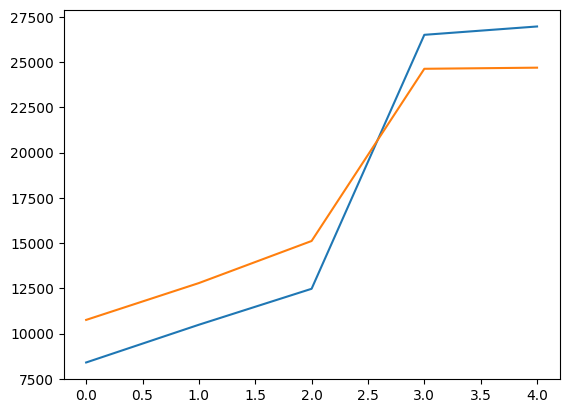

In [85]:
#Heaps' Law 해보기
k = 65 #10 ~ 100
b = .42 #.4 ~.6 
plt.plot(range(5), uniq)
plt.plot(range(5), list(map(lambda n:k*n**b, total)))

In [86]:
# k*n**b 이 부분을 변형해보기
k*100000000**b

148906.39742990522

In [91]:
objs.N(),\
k*objs.N()**b

(1386130, 24687.153711153154)

##### Heaps
문서 내 전체 단어의 빈도는 => 특정 법칙에 의해 유니크한 단어의 수와 비레한다.

k = 65, b=.42

=> 데이터셋(코퍼스;말뭉치)의 증가에 비례해서 / 유니한 단어의 수 (features)가 결정된다. 

=> feature selection / model size 가이드

# 한글로 해보기

In [92]:
from konlpy.corpus import kobill, kolaw
from konlpy.tag import Hannanum, Komoran, Kkma, Okt

In [94]:
ma = {'hannanum':Hannanum(), 'komoran':Komoran(),
     'kkma':Kkma(), 'okt':Okt()}

In [95]:
data = '쟤 완전 킹받네.'

for k,v in ma.items():
    print(k)
    print(v.pos(data))

hannanum
[('쟤', 'N'), ('완전', 'N'), ('킹받네', 'N'), ('.', 'S')]
komoran
[('쟤', 'NP'), ('완전', 'NNG'), ('킹', 'NNG'), ('받', 'VV'), ('네', 'EF'), ('.', 'SF')]
kkma
[('쟤', 'UN'), ('완전', 'NNG'), ('킹', 'NNG'), ('받', 'VV'), ('네', 'EFN'), ('.', 'SF')]
okt
[('쟤', 'Noun'), ('완전', 'Noun'), ('킹', 'Noun'), ('받네', 'Verb'), ('.', 'Punctuation')]


In [96]:
ma['hannanum'].tagset['N']

'체언'

In [99]:
data = '이정곤 감독은 유승호를 포함한 배우들이 거래를 대표작으로 내세울 수 있을 것이란 기대와 확신이 있다고 자신감을 드러내 이목을 집중시켰다.'

for k,v in ma.items():
    print(k)
    print(v.pos(data))

hannanum
[('이정곤', 'N'), ('감독', 'N'), ('은', 'J'), ('유승호', 'N'), ('를', 'J'), ('포함', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('배우들', 'N'), ('이', 'J'), ('거래', 'N'), ('를', 'J'), ('대표작', 'N'), ('으로', 'J'), ('내세우', 'P'), ('ㄹ', 'E'), ('수', 'N'), ('있', 'P'), ('을', 'E'), ('것', 'N'), ('이란', 'J'), ('기대', 'P'), ('어', 'E'), ('오', 'P'), ('아', 'E'), ('확신', 'N'), ('이', 'J'), ('있', 'P'), ('다', 'E'), ('고', 'J'), ('자신감', 'N'), ('을', 'J'), ('드러내', 'P'), ('어', 'E'), ('이목', 'N'), ('을', 'J'), ('집중', 'N'), ('시키', 'X'), ('었다', 'E'), ('.', 'S')]
komoran
[('이정', 'NNP'), ('곤', 'NNP'), ('감독', 'NNG'), ('은', 'JX'), ('유승호', 'NNP'), ('를', 'JKO'), ('포함', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('배우', 'NNG'), ('들', 'XSN'), ('이', 'JKS'), ('거래', 'NNG'), ('를', 'JKO'), ('대표작', 'NNG'), ('으로', 'JKB'), ('내세우', 'VV'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV'), ('을', 'ETM'), ('것', 'NNB'), ('이란', 'JX'), ('기대', 'NNG'), ('와', 'JC'), ('확신', 'NNG'), ('이', 'JKS'), ('있', 'VV'), ('다고', 'EC'), ('자신감', 'NNG'), ('을', 'JKO'), ('드러내', 'VV'), ('어', 'EC'), ('이

In [100]:
ma['hannanum'].tagset['P']

'용언'

In [104]:
ma['komoran'].tagset['VV']

'동사'

##### 형태소 분석기의 성능은 경우에 따라서 다르다. 

In [107]:
data = '아버지가방에들어가셨다 들어감 들어간다'

for k,v in ma.items():
    print(k)
    print(v.pos(data))

hannanum
[('아버지가방에들어가셨다', 'N'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('ㅁ', 'E'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('ㄴ다', 'E')]
komoran
[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('었', 'EP'), ('다', 'EC'), ('들어가', 'VV'), ('ㅁ', 'ETN'), ('들어가', 'VV'), ('ㄴ다', 'EC')]
kkma
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('었', 'EPT'), ('다', 'ECS'), ('듣', 'VV'), ('어', 'ECD'), ('감', 'NNG'), ('들어가', 'VV'), ('ㄴ다', 'EFN')]
okt
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가셨다', 'Verb'), ('들어감', 'Verb'), ('들어간다', 'Verb')]


In [106]:
ma['hannanum'].tagset['J']

'관계언'

In [110]:
ma['komoran'].tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [111]:

ma['komoran'].nouns('이정곤 감독은 유승호를 포함한 배우들이 거래를 대표작으로 내세울 수 있을 것이란 기대와 확신이 있다고 자신감을 드러내 이목을 집중시켰다.')

['이정',
 '곤',
 '감독',
 '유승호',
 '포함',
 '배우',
 '거래',
 '대표작',
 '수',
 '것',
 '기대',
 '확신',
 '자신감',
 '이목',
 '집중']

In [113]:
law = kolaw.open(kolaw.fileids()[0]).read()

In [116]:
len(law), len(law.split()), len(law.splitlines())

(18884, 4178, 356)

In [119]:
len(word_tokenize(law)), len(set(word_tokenize(law)))

(4640, 2023)

In [120]:
len(regexp_tokenize(law, r'\b\w+\b')), \
len(set(regexp_tokenize(law, r'\b\w+\b')))

(4325, 2085)

In [122]:
len(tokenizer.tokenize(law)),\
len(set(tokenizer.tokenize(law)))

NameError: name 'tokenizer' is not defined

In [123]:
len(sent_tokenize(law))

357

In [124]:
len(ma['komoran'].morphs(law))

9780

In [125]:
len(set(ma['komoran'].morphs(law)))

1214

In [126]:
t1 = Text(word_tokenize(law))
t2 = Text(ma['komoran'].morphs(law))

In [128]:
t1.vocab().N(), t2.vocab().N()

(4640, 9780)

In [129]:
list(zip(t1.vocab().most_common(10), t2.vocab().most_common(10)))

[(('.', 357), ('하', 472)),
 ((',', 101), ('의', 387)),
 (('수', 87), ('.', 360)),
 (('①', 75), ('에', 330)),
 (('또는', 70), ('는', 287)),
 (('의하여', 66), ('ㄴ다', 243)),
 (('법률이', 57), ('ㄴ', 236)),
 (('있다', 57), ('이', 230)),
 (('한다', 56), ('을', 225)),
 (('정하는', 50), ('은', 199))]

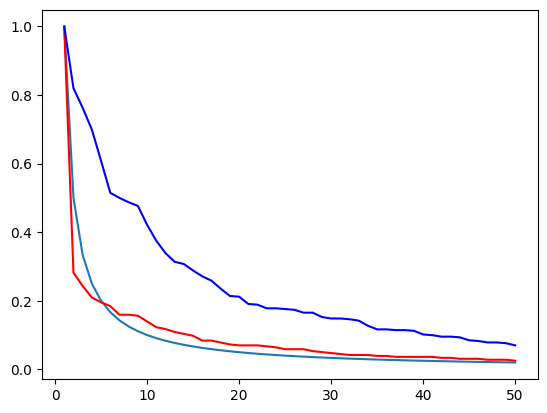

In [131]:
N=51
plt.plot(range(1,N), [1/i for i in range(1, N)])
plt.plot(range(1,N),
         [t[1]/358 for t in t1.vocab().most_common(N-1)],
        'r-')
plt.plot(range(1,N),
         [t[1]/472 for t in t2.vocab().most_common(N-1)],
        'b-')

In [132]:
sumof = 0.0
for k in sorted(t2.vocab(), key=t2.vocab().get, reverse=True)[:30]:
    sumof += t2.vocab().freq(k)
sumof

0.5221881390593046

In [133]:
sumof = 0.0
for k in sorted(t2.vocab(), key=t2.vocab().get)[:100]:
    sumof += t2.vocab().freq(k)
sumof

0.010224948875255624

In [136]:
list(filter(lambda t:len(t)>1,
       sorted(t2.vocab(), key=t2.vocab().get, reverse=True)[30:-800]))

['또는',
 '국회',
 '국민',
 '헌법',
 '으로',
 '관하',
 '아니하',
 '모든',
 '위하',
 '가지',
 '아야',
 '필요',
 '기타',
 '에서',
 '사항',
 '법관',
 '보장',
 '어야',
 '대하',
 '정부',
 '국회의원',
 '경제',
 '거나',
 '직무',
 '선거',
 '국무총리',
 '임명',
 '의무',
 '정당',
 '조직',
 '임기',
 '권리',
 '의결',
 '공무원',
 '경우',
 '이상',
 '의원',
 '국무위원',
 '자유',
 '항의',
 '보호',
 '정책',
 '헌법재판소',
 '노력',
 '법원',
 '요구',
 '아니',
 '집회',
 '출석',
 '찬성',
 '조약',
 '다만',
 '까지',
 '동의',
 '과반수',
 '행정',
 '탄핵',
 '대한민국',
 '에게',
 '공포',
 '이나',
 '심판',
 '재판',
 '처분',
 '교육',
 '시행',
 '재적',
 '중요',
 '위원',
 '권한',
 '자문',
 '대법원',
 '사회',
 '기본',
 '정치',
 '어서',
 '개정',
 '효력',
 '체포',
 '절차',
 '형사',
 '근로',
 '회의',
 '국정',
 '범위',
 '명령',
 '지방',
 '자치',
 '안전',
 '제정',
 '투표',
 '인정',
 '구속',
 '당하',
 '없이',
 '구성',
 '확정',
 '제출',
 '각부',
 '재판관',
 '단체',
 '대법원장',
 '따르',
 '생활',
 '수립',
 '유지',
 '이유',
 '행위',
 '제한',
 '기관',
 '공개',
 '로부터',
 '한하',
 '선출',
 '3분',
 '감사',
 '위안',
 '선거관리위원회',
 '국무회의',
 '관리',
 '최초',
 '평화',
 '통일',
 '승인',
 '으며',
 '10',
 '누구',
 '든지',
 '청구',
 '피고인',
 '지체',
 '소추',
 '인하',
 '침해',
 '군사',
 '재정',
 '개발',
 '의장',
 '규정',


In [139]:
total = 0
for t in list(filter(lambda t:t.startswith('법률'), t1.vocab().keys())):
    total += t1.vocab().get(t)
total

123

# 이번에는 힙스의 법칙

In [141]:
kobill.open(kobill.fileids()[0]).read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [146]:
from nltk.tokenize import regexp_tokenize

In [148]:
import re

In [170]:
ktokens = list()
kmorphs = list()

ktokens.append(FreqDist()) #비어있는 0번째 인덱스에 FreqDist()객체에 지금분석한걸 담을거임.
kmorphs.append(FreqDist())

for doc in kobill.fileids():
    morphs = list()
    corpus = kobill.open(doc).read()
    ktokens.append(ktokens[-1] + Text(word_tokenize(corpus)).vocab()) 
    for s in sent_tokenize(re.sub(r'\s{2,}', ' ', corpus)):
        # JAVA 에는 공간이 한정적이라서, 문장이 너무 길어도 안된다. 그래서 띄어쓰기도 좀 제거해서 최소화한 상태에서 tokenizer 를 돌린거라고 한다.
        if len(s) > 1:
            morphs.extend(ma['komoran'].morphs(s))
    kmorphs.append(kmorphs[-1] + Text(morphs).vocab())

In [171]:
ktokens[0]

FreqDist({})

In [172]:
for k in ktokens:
    print(k.N(), k.B())

0 0
1124 536
2240 544
3638 656
4727 720
5003 830
5509 983
7952 1567
8860 1874
9806 2041
12338 2479


### 헌법을 Text 에 넣어서 볼 수 있는게 뭔지 확인하기

In [155]:
lawText = Text(ma['komoran'].morphs(law))

In [156]:
lawText.collocations()
#의미 있는 걸 찾을 수가 없다,,,;;;; 그래도 의미 있는걸로 굳이 찾아낸걸로 볼 수 있다.

헌법재판소 재판관


In [157]:
lawText.concordance('국민')

Displaying 25 of 67 matches:
대한민국 헌법 유구 하 ㄴ 역사 와 전통 에 빛나 는 우리 대하 ㄴ 국민 은 3 · 1 운동 으로 건립 되 ㄴ 대한민국 임시 정부 의 법통 
 에 따르 는 책임 과 의무 를 완수 하 게 하 아 , 안 으로 는 국민 생활 의 균등 하 ㄴ 향상 을 기하 고 밖 으로 는 항구 적 이 ㄴ
 에 걸치 어 개정 되 ㄴ 헌법 을 이제 국회 의 의결 을 거치 어 국민 투표 에 의하 아 개정 하 ㄴ다 . 제 1 장 총 강 제 1 조 ①
 조 ① 대한민국 은 민주공화국 이 다 . ② 대한민국 의 주권 은 국민 에게 있 고 , 모든 권력 은 국민 으로부터 나오 ㄴ다 . 제 2 
다 . ② 대한민국 의 주권 은 국민 에게 있 고 , 모든 권력 은 국민 으로부터 나오 ㄴ다 . 제 2 조 ① 대한민국 의 국민 이 되 는 
든 권력 은 국민 으로부터 나오 ㄴ다 . 제 2 조 ① 대한민국 의 국민 이 되 는 요건 은 법률 로 정하 ㄴ다 . ② 국가 는 법률 이 정
에 의하 아 그 지위 가 보장 되 ㄴ다 . 제 7 조 ① 공무원 은 국민 전체 에 대하 ㄴ 봉사자 이 며 , 국민 에 대하 아 책임 을 지 
 제 7 조 ① 공무원 은 국민 전체 에 대하 ㄴ 봉사자 이 며 , 국민 에 대하 아 책임 을 지 ㄴ다 . ② 공무원 의 신분 과 정치 적 
정당 은 그 목적 · 조직 과 활동 이 민주 적 이 어야 하 며 , 국민 의 정치 적 의사 형성 에 참여 하 는데 필요 하 ㄴ 조직 을 가지
 아야 하 ㄴ다 . 제 2 장 국민의 권리와 의무 제 10 조 모든 국민 은 인간 으로서 의 존엄 과 가치 를 가지 며 , 행복 을 추구 하
 고 이 를 보장 하 ㄹ 의무 를 지 ㄴ다 . 제 11 조 ① 모든 국민 은 법 앞 에 평등 하 다 . 누구 이 든지 성별 · 종교 또는 사
 ㄴ 특권 도 이 에 따르 지 아니하 ㄴ다 . 제 12 조 ① 모든 국민 은 신체의 자유 를 가지 ㄴ다 . 누구 이 든지 법률 에 의하 지 
벌 · 보안처분 또는 강제 노역 을 받 지

In [158]:
lawText.similar('국민')
#'국민' 단어와 가장 연관성있는거. 

국회 국가 법관 법원 국회의원 대통령 대한민국 정부 조국 공무원 헌법재판소 재판 타인 군사법원 판결 근로 여자 국정 국무회의
대법원장


In [159]:
lawText.similar('권력')

국민


In [160]:
lawText.similar('대통령')

법률 국회의원 공무원 국무위원 법관 대법원장 국민 국회 국군 조약 정당 법원 국정 위원 대한민국 헌법 국가 정책 효력 발전


In [161]:
lawText.similar('국회의원')

대통령 공무원 법관 국민 법원 국무위원 위원 대한민국 국회 법률 국가 국군 정당 이상 재판 군인 군사법원 여자 국정 감사원


In [162]:
lawText.similar('여자')

국민 법관 법원 군사법원 국회의원 정부 국회 국가 국군 공무원 헌법재판소 전통문화 불가침 검사 인 피고인 재판 재산권 과학기술
청원


In [164]:
bigram = BigramCollocationFinder.from_words(ma['komoran'].morphs(law))

In [167]:
bigram.nbest(BigramAssocMeasures.pmi, 10)

[('가부', '동수'),
 ('강제', '노역'),
 ('경자', '유전'),
 ('교전', '상태'),
 ('국립', '대학교'),
 ('군', '참모총장'),
 ('군용', '물'),
 ('궐위되거나', '사고'),
 ('더욱', '확고히'),
 ('도로', '발휘')]

In [168]:
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

[('가부', '동수'),
 ('강제', '노역'),
 ('경자', '유전'),
 ('교전', '상태'),
 ('국립', '대학교'),
 ('군', '참모총장'),
 ('군용', '물'),
 ('궐위되거나', '사고'),
 ('내부', '규율'),
 ('더욱', '확고히')]

In [173]:
# bigram 도 유의미한 단어 쌍들을 보여주고, 하나로 취급할 수도 있다. 

# n-gram